#Etapa inicial, leitura da base de dados
Neste caso vamos usar a IRIS dataset



In [121]:
import pandas as pd
dados = pd.read_csv('https://archive.ics.uci.edu/static/public/53/data.csv')

In [122]:
dados

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [123]:
dados.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

### Vamos separar os dados em X e Y, onde X são as features(atributos) e Y são as labels (rótulos).

In [124]:
#Colunas de dados: dados['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
X = dados[['sepal length', 'sepal width', 'petal length', 'petal width']]

In [125]:
# com isso, agora temos na variavel X apenas as colunas ('sepal length', 'sepal width', 'petal length', 'petal width') dos dados, excluimos a coluna classe.
print(f'colunas de dados {dados.columns}')
print(f'colunas de X {X.columns}')

colunas de dados Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')
colunas de X Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')


In [126]:
#vamos agora pegar apenas os rótulos (Y) da coluna classe
y = dados['class']

In [128]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [129]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Divisão de treino e teste
Neste momento já temos os dados divididos e X e Y.
Agora vamos dividir em treino e teste. Usando a biblioteca Scikit-learn.

In [9]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [63]:
X_train

,sepal length,sepal width,petal length,petal width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
X_test.shape

(135, 4)

In [19]:
y_train

,class
22,Iris-setosa
15,Iris-setosa
65,Iris-versicolor
11,Iris-setosa
42,Iris-setosa
...,...
71,Iris-versicolor
106,Iris-virginica
14,Iris-setosa
92,Iris-versicolor


In [20]:
#verificando quanto exemplos de cada classe temos no y de treino
y_train.value_counts()

,count
class,
Iris-versicolor,41
Iris-setosa,40
Iris-virginica,39


### Treinamento do modelo
Vamos agora treinar um primeiro modelo classificador sobre os dados.

In [21]:
# prompt: Crie um codigo prar treinar uma regressao logistica usando sklearn com alguns parametros simples , sabendo que meus dados já estão divididos em treino e teste da seguinte forma: X_train, X_test, y_train, y_test

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [22]:
# Crie um modelo de Regressão Logística
modelo = LogisticRegression(max_iter=100)  # Aumente max_iter se necessário


In [23]:
modelo.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
modelo.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

Nesse momento eu não consigo recuperar os pesos do modelo pq ele ainda nem foi treinado. Vamos treinar no passa seguinte.


In [25]:
# Treine o modelo com os dados de treinamento
modelo.fit(X_train, y_train)

LogisticRegression()

In [26]:
#agora podemos ver os pesos gerados no treinamento (otimização dos parametros) no modelo após o fit(treino).
#modelo novo, com poucos dados
modelo.coef_

array([[-0.39634076,  0.9523916 , -2.37629048, -1.01351596],
       [ 0.51221741, -0.24809347, -0.21455322, -0.76203024],
       [-0.11587664, -0.70429814,  2.5908437 ,  1.7755462 ]])

In [ ]:
#agora podemos ver os pesos gerados no treinamento (otimização dos parametros) no modelo após o fit(treino).
modelo.coef_

array([[-0.38778417,  0.84838859, -2.24895385, -0.96098607],
       [ 0.43848345, -0.35543359, -0.12216122, -0.76562952],
       [-0.05069928, -0.492955  ,  2.37111507,  1.72661559]])

Predições do modelo, ou seja, agora nosso modelo treinado vai 'prever' valores ( y^ )̂ara atibutos informados

### Predict
Vamos fazer predições (y estimado ŷ) para dados informados (atributos, x) usando o modelo que acabamos de treinar.  

Para isso vamos usar a *função* 'predict' do modelo.

In [27]:
dados.sample(1)


,sepal length,sepal width,petal length,petal width,class
67,5.8,2.7,4.1,1.0,Iris-versicolor


In [31]:
# Crie um array com os valores que você deseja prever
#'sepal length', 'sepal width', 'petal length', 'petal width'
novos_dados = [[5.8, 	2.7, 	4.1, 	1.0]]

# Use o modelo treinado para fazer a previsão
previsao = modelo.predict(novos_dados)

# Imprima a previsão
print(f"A previsão para os novos dados é: {previsao[0]}")

A previsão para os novos dados é: Iris-versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#vamos criar um exemplo imaginario baseado apenas na distribuição da iris setosa
dados[dados['class']=='Iris-setosa'].describe()

,sepal length,sepal width,petal length,petal width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [ ]:
#Vamos ver se ele está acertando.
novos_dados = [[4.925, 3.555, 1.33, 0.27]]

# Use o modelo treinado para fazer a previsão
previsao = modelo.predict(novos_dados)

# Imprima a previsão
print(f"A previsão para os novos dados é: {previsao[0]}")

A previsão para os novos dados é: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
X_test.head(1)

,sepal length,sepal width,petal length,petal width
73,6.1,2.8,4.7,1.2


In [ ]:
y_test.head(1)

,class
73,Iris-versicolor


### Validação

Vamos agora verificar para mais dados se o modelo está acertando. Na etapa anterior testamos individualmente cada exemplo.

Para isso vamos usar métricas de avaliação, nesse caso a Accuracy (acc).

Vamos usar  a função `accuracy_score(y_test, y_pred)` do sklearn.

```
    y(teste)   y predito (saida do modelo)
1 A                A                                 OK
2 B                A                                 ERR
3 C                A                                 ERR
4 B                B                                 OK
5 C                A                                 ERR

acc = 40% ou 0.4
```

In [34]:
# o exemplo anterior é exatamente o que faz a função accuracy_score(y_test, y_pred)
exemplo_resultados_saida_do_modelo = ['A', 'A', 'A', 'B', 'A']
exemplo_valores_conhecidos = ['A', 'B', 'C', 'B', 'A']
resultado = accuracy_score(exemplo_resultados_saida_do_modelo, exemplo_valores_conhecidos)

In [35]:
print(resultado)

0.6


In [ ]:
#Agora vamos fazer para todos os dados, primeiro vamos pegar TODAS as predições no conjunto de TESTE

In [36]:
y_pred = modelo.predict(X_test)

In [37]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [38]:
y_pred.shape

(30,)

In [39]:
y_test.shape

(30,)

In [40]:


# Avalie a precisão do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia}")

Acurácia do modelo: 1.0


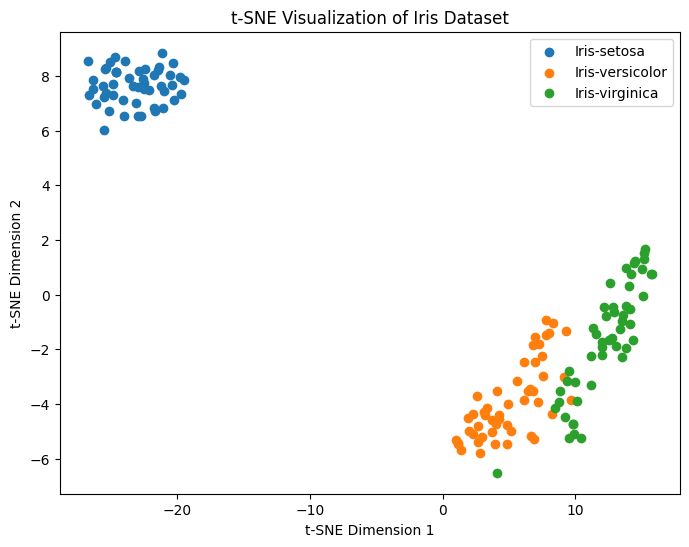

In [41]:
# prompt: faça o plot dodados da iris , presente na minha variavel dados, usando t-sne de 2 dim e apresente o plot segragado por classe

import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'dados' is your DataFrame with the Iris dataset

# Extract features and target variable
X = dados[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = dados['class']

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot with different colors for each class
plt.figure(figsize=(8, 6))
for label in y.unique():
  mask = y == label
  plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=label)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Iris Dataset')
plt.legend()
plt.show()

# Treino e teste com K-Fold Cross Validation


In [130]:
from sklearn.model_selection import KFold


In [131]:
kf = KFold(n_splits=10, shuffle=True)

In [132]:
kf.get_n_splits()

10

In [144]:
resultados = []
for i, (train_index, test_index) in enumerate(kf.split(X)):

    print(f"Fold {i+1}:")
    print(f"  Train: index={len(train_index)}")
    print(f"  Test:  index={len(test_index)}")
    print(f"  Test:  index={test_index}")

    #executar os treinamentos dos modelos:
    modelo = LogisticRegression(max_iter=100)
    modelo.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = modelo.predict(X.iloc[test_index])
    print(len(y_pred))
    acc_fold = accuracy_score(y.iloc[test_index], y_pred)
    print(acc_fold)
    resultados.append(acc_fold)






Fold 1:
  Train: index=135
  Test:  index=15
  Test:  index=[  2   9  22  26  30  35  61  69  70  71  83  94  97 111 138]
15
0.8666666666666667
Fold 2:
  Train: index=135
  Test:  index=15
  Test:  index=[  5  16  21  25  45  50  53  77  85 114 122 128 140 145 149]
15
0.9333333333333333
Fold 3:
  Train: index=135
  Test:  index=15
  Test:  index=[  0   1   6  33  40  74  81  92 108 112 116 118 129 136 142]
15
1.0
Fold 4:
  Train: index=135
  Test:  index=15
  Test:  index=[ 11  19  23  24  28  29  47  66  82  84 115 123 126 134 147]
15
1.0
Fold 5:
  Train: index=135
  Test:  index=15
  Test:  index=[  8  20  41  49  55  64  68  87  98 101 102 109 130 146 148]
15
1.0
Fold 6:
  Train: index=135
  Test:  index=15
  Test:  index=[ 13  37  44  54  72  76  78  93  99 100 105 120 139 143 144]
15
1.0
Fold 7:
  Train: index=135
  Test:  index=15
  Test:  index=[  3   7  14  27  31  36  42  58  62  91  96 107 119 124 127]
15
0.9333333333333333
Fold 8:
  Train: index=135
  Test:  index=15
  Test:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [145]:
resultados

[0.8666666666666667,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9333333333333333,
 1.0,
 1.0,
 0.8666666666666667]

In [146]:
np.mean(resultados)

0.9600000000000002